In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.signal import butter, filtfilt, iirnotch
import neurokit2 as nk
import pandas as pd

# Zeige ein gesundes EKG

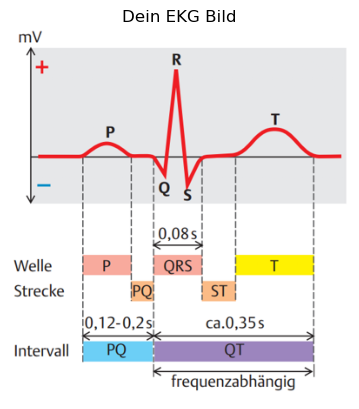

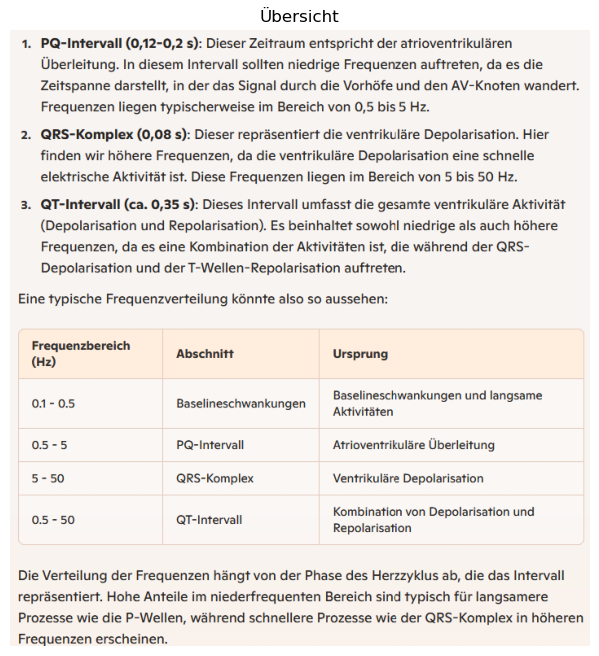

In [32]:
image_path1 = 'ecg_data.png' # HS Offebnurg
image_path2 = 'ecg_explain.png'
img = mpimg.imread(image_path1) 
plt.imshow(img) 
plt.axis('off') 
plt.title('Dein EKG Bild') 
plt.show()

img = mpimg.imread(image_path2) 
plt.figure(figsize=(12, 8))
plt.imshow(img) 
plt.axis('off') 
plt.title('Übersicht') 
plt.show()

# Generiere ein EKG-Signal
Die Abtastfrequenz von 500 Hz wird gewählt, um das EKG-Signal akkurat zu repräsentieren.
Laut dem Nyquist-Kriterium sollte die Abtastfrequenz mindestens doppelt so hoch wie die höchste Frequenzkomponente sein.
Typische EKG-Signale haben Frequenzanteile bis etwa 100 Hz, daher ist 500 Hz angemessen. (1000 Hz: Wird oft in Forschungsumgebungen und bei detaillierteren Analysen verwendet.)

In [33]:
fs = 500  # Abtastfrequenz in Hz
length = 6  # Länge des Signals in Sekunden
signal = nk.ecg_simulate(duration=length, sampling_rate=fs)
t = np.linspace(0, length, len(signal))

# Sauberes EKG-Signal anzeigen

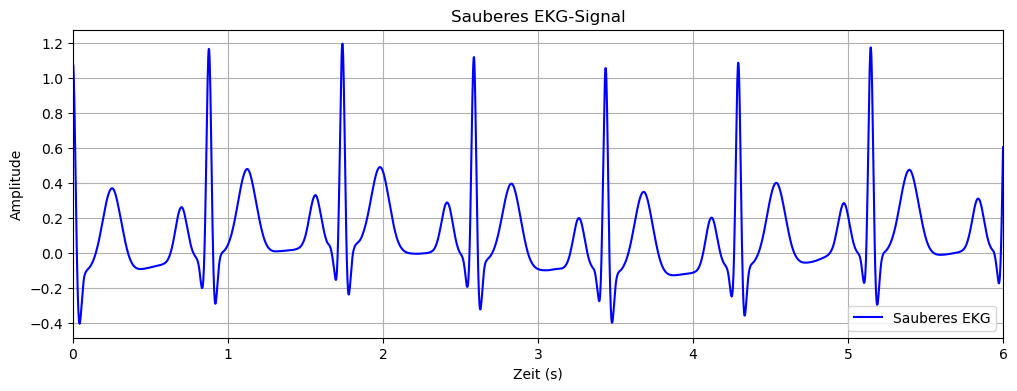

In [34]:
plt.figure(figsize=(12, 4))
plt.plot(t, signal, label="Sauberes EKG", color="blue")
plt.xlim(0, length)  # Begrenzung auf 6 Sekunden
plt.title("Sauberes EKG-Signal")
plt.xlabel("Zeit (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

# Fourier-Spektrum des sauberen Signals

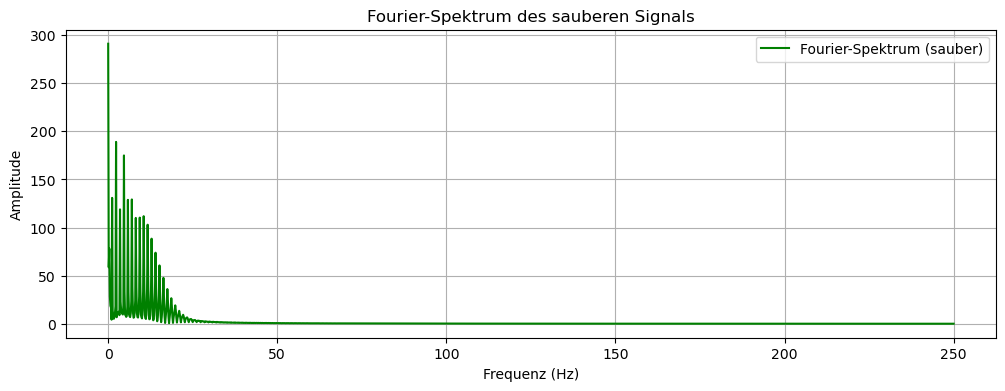

In [35]:
frequencies_clean = np.fft.rfftfreq(len(signal), d=1/fs)
amplitudes_clean = np.abs(np.fft.rfft(signal))
plt.figure(figsize=(12, 4))
plt.plot(frequencies_clean, amplitudes_clean, label="Fourier-Spektrum (sauber)", color="green")
plt.title("Fourier-Spektrum des sauberen Signals")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


# 50-Hz-Netzrauschen hinzufügen

In [36]:
freq = 50  # Netzfrequenz in Hz
noise = 0.5 * np.sin(2 * np.pi * freq * t)  # 50-Hz-Rauschen mit größerer Amplitude
signal_noisy = signal + noise

# Verrauschtes Signal anzeigen

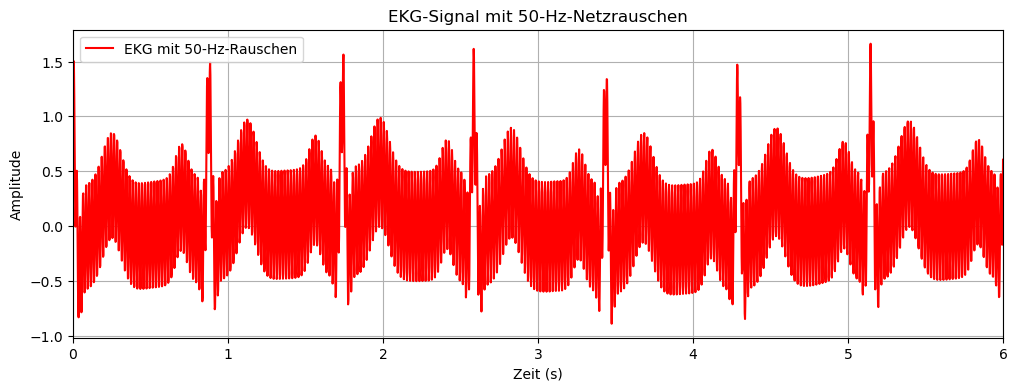

In [37]:
plt.figure(figsize=(12, 4))
plt.plot(t, signal_noisy, label="EKG mit 50-Hz-Rauschen", color="red")
plt.xlim(0, length)  # Begrenzung auf 6 Sekunden
plt.title("EKG-Signal mit 50-Hz-Netzrauschen")
plt.xlabel("Zeit (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

# Fourier-Spektrum des verrauschten Signals

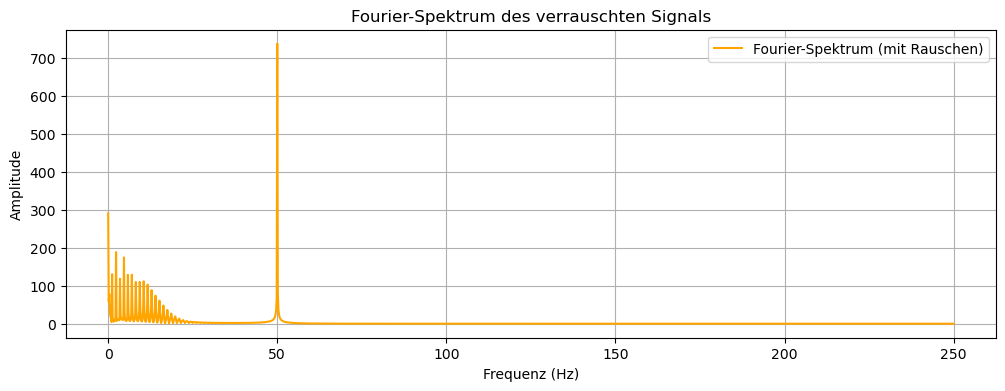

In [38]:
frequencies_noisy = np.fft.rfftfreq(len(signal_noisy), d=1/fs)
amplitudes_noisy = np.abs(np.fft.rfft(signal_noisy))
plt.figure(figsize=(12, 4))
plt.plot(frequencies_noisy, amplitudes_noisy, label="Fourier-Spektrum (mit Rauschen)", color="orange")
plt.title("Fourier-Spektrum des verrauschten Signals")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

# 50-Hz-Rauschen filtern
Notch-Filter bei 50 Hz

In [39]:
notch_freq = 50.0  # Frequenz des Rauschens
quality_factor = 30.0  # Qualitätsfaktor für den Notch-Filter
b, a = iirnotch(w0=notch_freq / (fs / 2), Q=quality_factor)
signal_filtered = filtfilt(b, a, signal_noisy)

# Gefiltertes Signal anzeigen

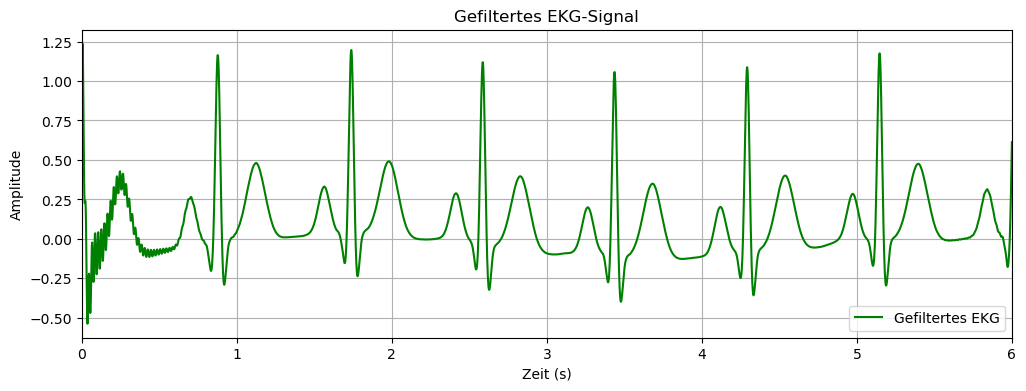

In [40]:
plt.figure(figsize=(12, 4))
plt.plot(t, signal_filtered, label="Gefiltertes EKG", color="green")
plt.xlim(0, length)  # Begrenzung auf 6 Sekunden
plt.title("Gefiltertes EKG-Signal")
plt.xlabel("Zeit (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

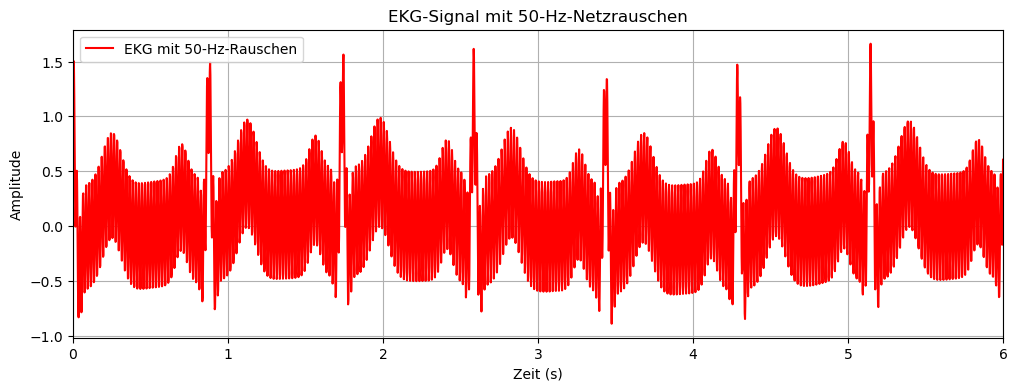

In [46]:
plt.figure(figsize=(12, 4))
plt.plot(t, signal_noisy, label="EKG mit 50-Hz-Rauschen", color="red")
plt.xlim(0, length)  # Begrenzung auf 6 Sekunden
plt.title("EKG-Signal mit 50-Hz-Netzrauschen")
plt.xlabel("Zeit (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

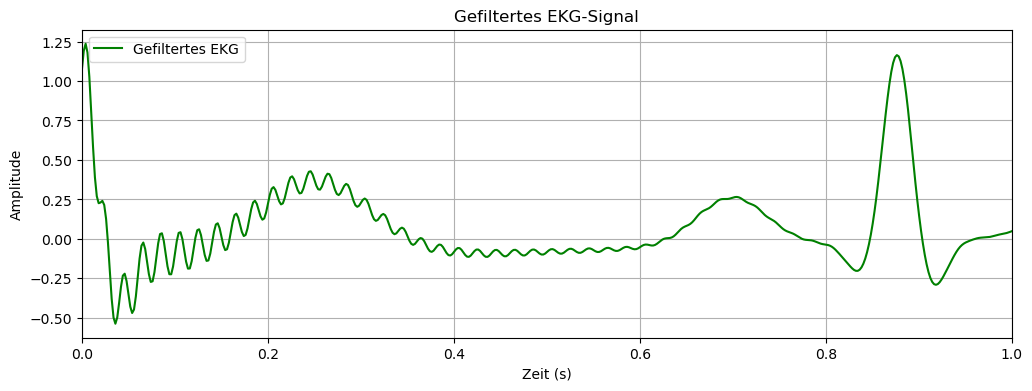

In [45]:
plt.figure(figsize=(12, 4))
plt.plot(t, signal_filtered, label="Gefiltertes EKG", color="green")
plt.xlim(0, 1)  # Begrenzung auf 6 Sekunden
plt.title("Gefiltertes EKG-Signal")
plt.xlabel("Zeit (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

Initialisierungsproblematik:

    IIR-Filter sind rekursive Filter, was bedeutet, dass sie auf vorherige Ausgaben angewiesen sind. Bei der ersten Anwendung des Filters sind diese vorherigen Werte nicht definiert, was zu einer ungenauen Reaktion führt. Dies ist besonders ausgeprägt, wenn der Filter auf ein Signal mit plötzlichen Änderungen angewendet wird.

Dauer der transienten Effekte:

    Die Dauer der transienten Effekte hängt von den Eigenschaften des Filters ab, insbesondere von der Qualität (Q-Faktor). Ein höherer Q-Faktor führt in der Regel zu einer schmaleren Ablehnung und damit zu längeren transienten Reaktionen. Das bedeutet, dass bei einem Notch-Filter mit hohem Q-Faktor das Artefakt länger sichtbar bleibt, während sich das Filter an das Signal anpasst

# Fourier-Spektrum des gefilterten Signals

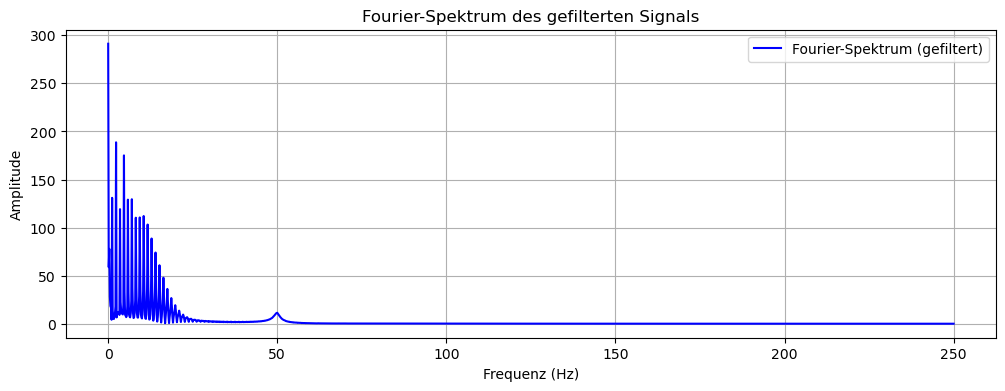

In [41]:
frequencies_filtered = np.fft.rfftfreq(len(signal_filtered), d=1/fs)
amplitudes_filtered = np.abs(np.fft.rfft(signal_filtered))
plt.figure(figsize=(12, 4))
plt.plot(frequencies_filtered, amplitudes_filtered, label="Fourier-Spektrum (gefiltert)", color="blue")
plt.title("Fourier-Spektrum des gefilterten Signals")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

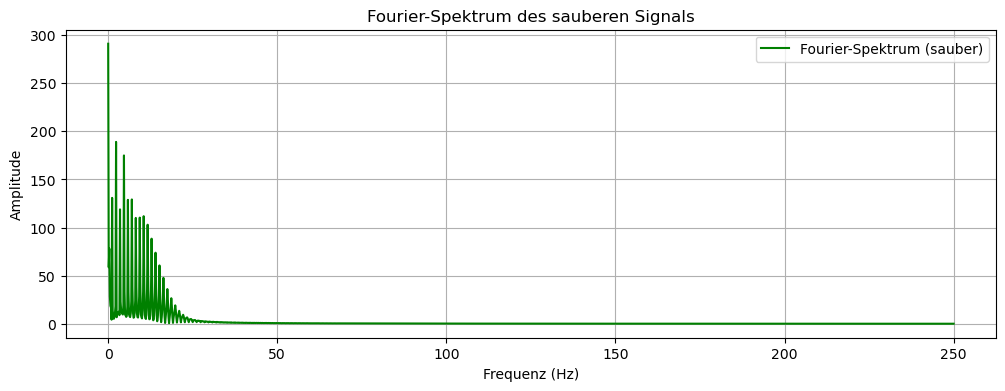

In [47]:
frequencies_clean = np.fft.rfftfreq(len(signal), d=1/fs)
amplitudes_clean = np.abs(np.fft.rfft(signal))
plt.figure(figsize=(12, 4))
plt.plot(frequencies_clean, amplitudes_clean, label="Fourier-Spektrum (sauber)", color="green")
plt.title("Fourier-Spektrum des sauberen Signals")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

# Spektrogramm des sauberen Signals mit unterschiedlichen Zeitfenstern

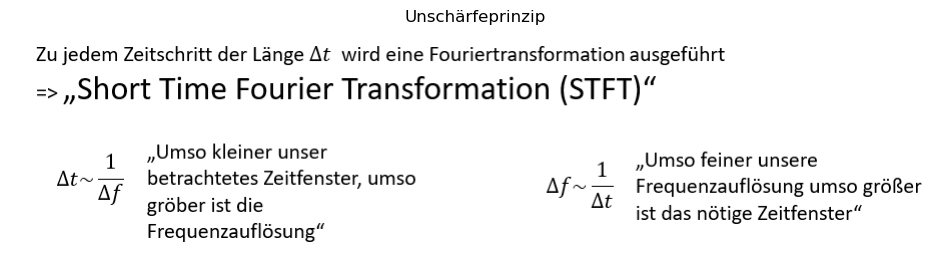

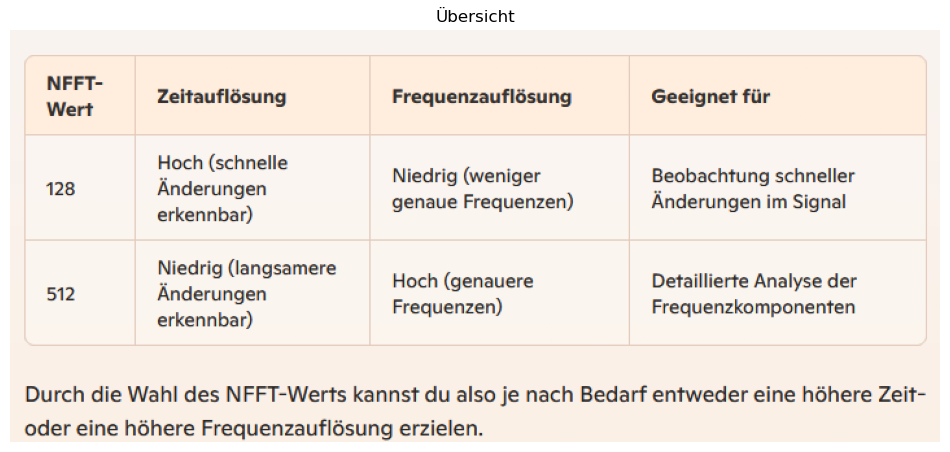

In [55]:
image_path3 = 'stft_tim.png' # HS Offebnurg
image_path4 = 'stft_explain.png'
img = mpimg.imread(image_path3) 
plt.figure(figsize=(12, 8))
plt.imshow(img) 
plt.axis('off') 
plt.title('Unschärfeprinzip') 
plt.show()

img = mpimg.imread(image_path4) 
plt.figure(figsize=(12, 8))
plt.imshow(img) 
plt.axis('off') 
plt.title('Übersicht') 
plt.show()

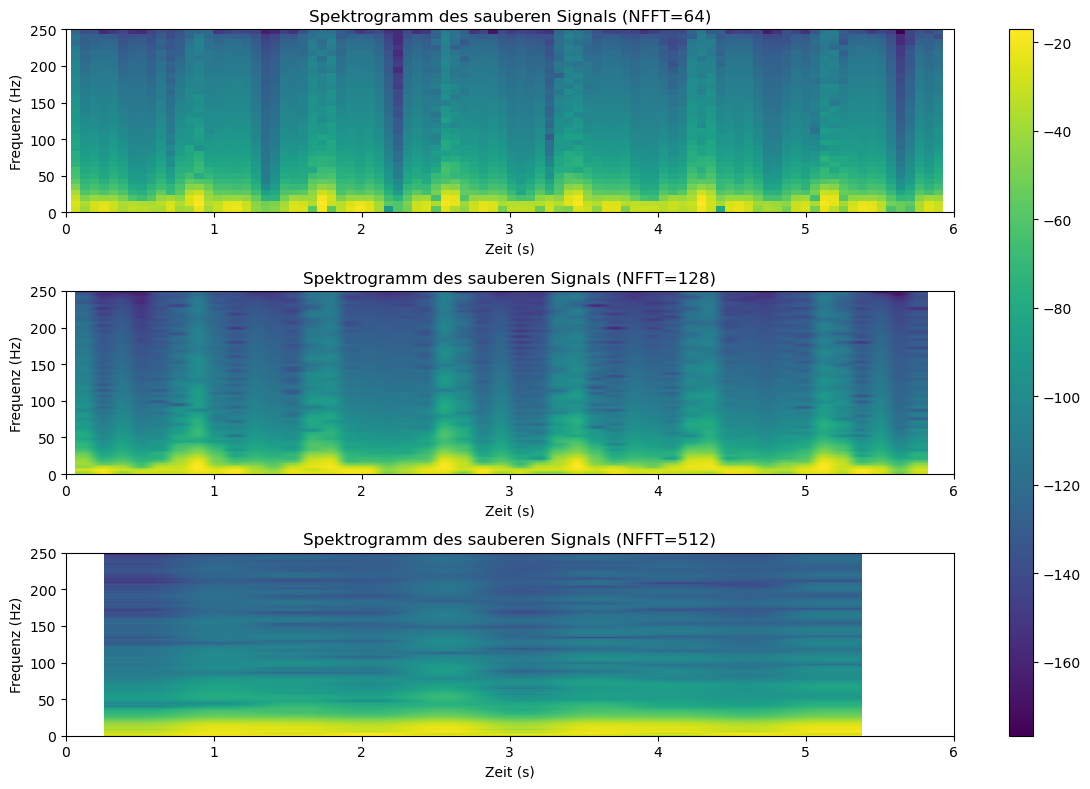

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
for ax, nfft in zip(axes, [64, 128, 512]):
    Pxx, freqs, bins, im = ax.specgram(signal, Fs=fs, NFFT=nfft, noverlap=nfft//2, cmap="viridis")
    ax.set_xlim(0, length)  # Begrenzung auf 6 Sekunden
    ax.set_title(f"Spektrogramm des sauberen Signals (NFFT={nfft})")
    ax.set_xlabel("Zeit (s)")
    ax.set_ylabel("Frequenz (Hz)")
plt.tight_layout()
plt.colorbar(im, ax=axes, location='right', aspect=30)
plt.show()

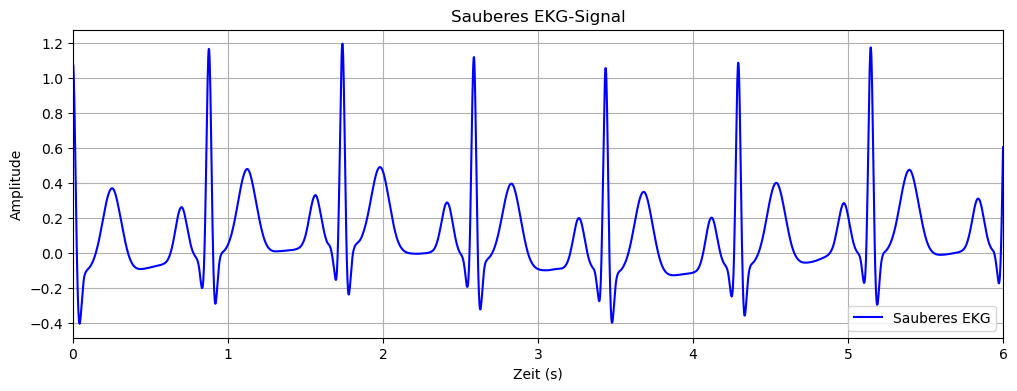

In [56]:
plt.figure(figsize=(12, 4))
plt.plot(t, signal, label="Sauberes EKG", color="blue")
plt.xlim(0, length)  # Begrenzung auf 6 Sekunden
plt.title("Sauberes EKG-Signal")
plt.xlabel("Zeit (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

# Spektrogramm des verrauschten Signals mit unterschiedlichen Zeitfenstern

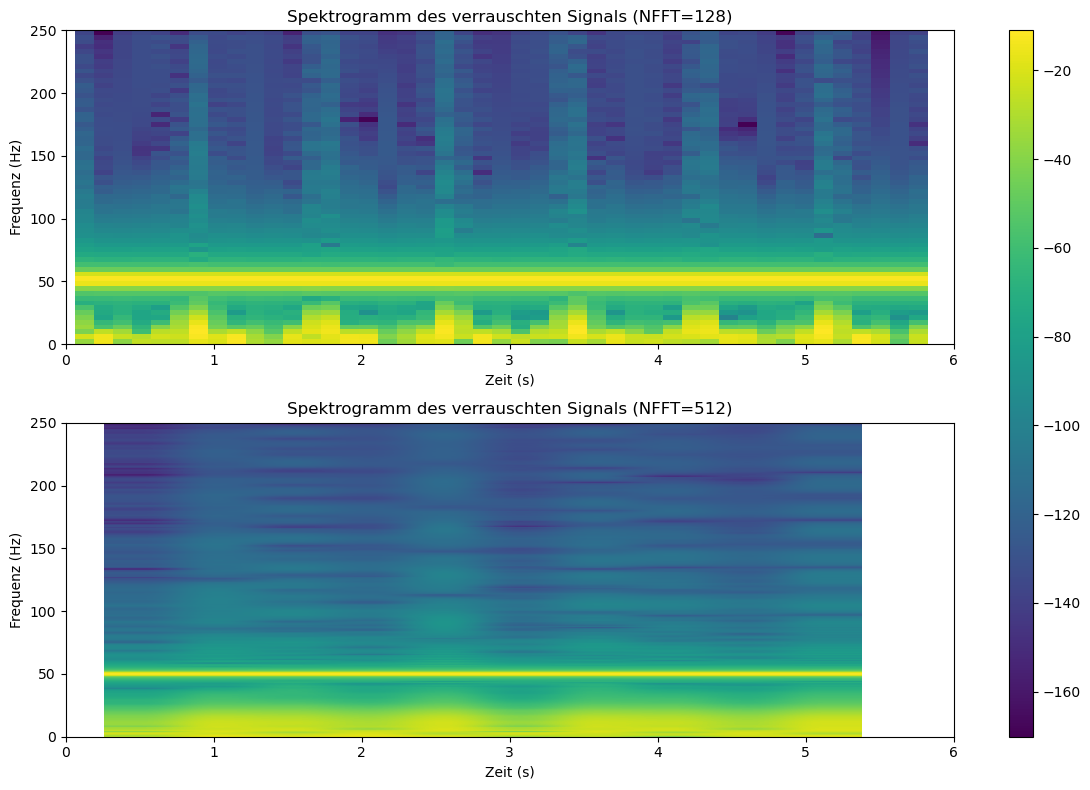

In [52]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
for ax, nfft in zip(axes, [128, 512]):
    Pxx, freqs, bins, im = ax.specgram(signal_noisy, Fs=fs, NFFT=nfft, noverlap=nfft//2, cmap="viridis")
    ax.set_xlim(0, length)  # Begrenzung auf 6 Sekunden
    ax.set_title(f"Spektrogramm des verrauschten Signals (NFFT={nfft})")
    ax.set_xlabel("Zeit (s)")
    ax.set_ylabel("Frequenz (Hz)")
plt.tight_layout()
plt.colorbar(im, ax=axes, location='right', aspect=30)
plt.show()

# Spektrogramm des gefilterten Signals mit unterschiedlichen Zeitfenstern

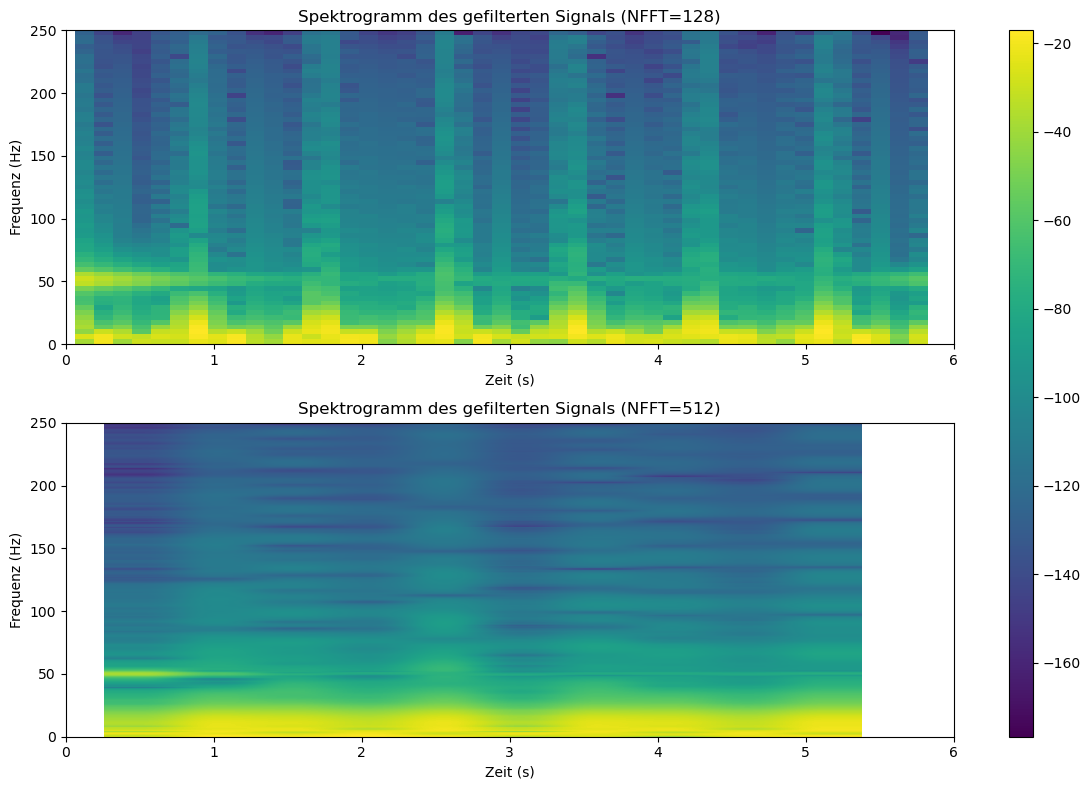

In [44]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
for ax, nfft in zip(axes, [128, 512]):
    Pxx, freqs, bins, im = ax.specgram(signal_filtered, Fs=fs, NFFT=nfft, noverlap=nfft//2, cmap="viridis")
    ax.set_xlim(0, length)  # Begrenzung auf 6 Sekunden
    ax.set_title(f"Spektrogramm des gefilterten Signals (NFFT={nfft})")
    ax.set_xlabel("Zeit (s)")
    ax.set_ylabel("Frequenz (Hz)")
plt.tight_layout()
plt.colorbar(im, ax=axes, location='right', aspect=30)
plt.show()